In [11]:
import os
import shutil

In [6]:
BASE_DIR = "newdata/data_excel_finalmatrix_modified/"

In [3]:
for file in os.listdir(BASE_DIR):
    print(file)

Anjali32.xlsx
haque_34_fm.xlsx
20_arka_fm.xlsx
anuraag_1_fm.xlsx
anshul_40_fm.xlsx
vrajesh_20.xlsx
sweta_40_fm.xlsx
sweta_26_fm.xlsx
fm_reddy_20.xlsx
fm_vamsi_21.xlsx
fm_sudhir_21.xlsx
fm_haque_34.xlsx
fm_reddy_39.xlsx
fm_Arihant_23.xlsx
anshul_2_fm.xlsx
Harshit_5.xlsx
fm_vamsi_32.xlsx
shashi5.xlsx
anuraag_28_fm.xlsx
Achal_37_fm.xlsx
fm_sumanth_7.xlsx
fm_reddy_24.xlsx
mayur_32.xlsx
Meet5.xlsx
fm_atrayee_16.xlsx
chinmoy_16_fm.xlsx
depeesh_35_fm.xlsx
archit_34_fm.xlsx
anjali_38_fm.xlsx
fm_Arpit_33.xlsx
mayur_21.xlsx
fm_sweta_34.xlsx
sumanth_21.xlsx
nikhil_10.xlsx
fm_Shashi_14.xlsx
shweta32.xlsx
diya_32.xlsx
fm_sidhaant_24.xlsx
Vrajesh_37_fm.xlsx
fm_niks6.xlsx
chinmoy_34_fm.xlsx
fm_arka_22.xlsx
fm_niks_8.xlsx
Anshul5.xlsx
arka24.xlsx
haque_17.xlsx
Anuraag_21_fm.xlsx
fm_saumya_24.xlsx
vreajesh32.xlsx
arihant32.xlsx
fm_arpit_29.xlsx
sudhir_24.xlsx
Niks_5.xlsx
aditya_13_fm.xlsx
fm_saumya_39.xlsx
koushik_17_fm.xlsx
fm_arpit_22.xlsx
fm_archit_3.xlsx
sankalp5.xlsx
Rajedeep_21_fm.xlsx
fm_meet_10

In [4]:
selected = [
    "aditya32",
    "fm_rajdeep_37",
    "shweta32",
    "Anjali32",
    "sudhansu_32",
    "achal32",
    "Achal_37_fm",
    "vreajesh32",
    "Vrajesh_37_fm",
    "Vishal_32",
    "fm_haque_32",
    "arihant32",
    "archit_37_fm",
    "abhishek_32",
    "fm_vamsi_32",
    "diya_32",
    "fm_sumanth_32",
    "mayur_32",
    "fm_atrayee_37",
    "nikesh_37",
    "niloy_37"
]

In [9]:
SOURCE_DIR = "filter_plots/5_0/"
DESTINATION_DIR = "filter_plots/selected_plots/"

In [12]:
if not os.path.exists(DESTINATION_DIR):
    os.mkdir(DESTINATION_DIR)

all_plots =  os.listdir(SOURCE_DIR)
for sub in selected:
    for plot in all_plots:
        if sub in plot:
            shutil.copy(SOURCE_DIR + plot,DESTINATION_DIR + plot)

# First Derivative

In [2]:
import numpy as np
import pandas as pd
import os
import shutil

In [3]:
BASE_DIR = "filter_plots/5_0/"
DEST_DIR = "filter_plots/first_derivative/"
if not os.path.exists(DEST_DIR):
    os.mkdir(DEST_DIR)

In [ ]:
for file in os.listdir(BASE_DIR):
    if file[-5:] == ".xlsx":
        shutil.copy(BASE_DIR+file,DEST_DIR+file)

In [1]:
SOURCE = "filter_plots/selected_plots/"
DEST = "code_32/all_plots/"

In [3]:
for file in os.listdir(SOURCE):
    if "32" in file:
        shutil.copy(SOURCE+file,DEST+file)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def plot_data(data,saveplace=None,isDerivative = False):
        plt.figure(figsize=(20,12))
        plt.xlabel('Timestep (microseconds)',fontsize='x-large')
        plt.ylabel('Line Number',fontsize='x-large')
        plt.scatter(data[:,1],data[:,0])
        y_min = np.min(data[:,0])
        y_max = np.max(data[:,0])
        if isDerivative:
            thresh_lim = -60
        else:
            thresh_lim = 0
        plt.ylim(max(0,y_max+5),min(thresh_lim,y_min-5))
        if saveplace is not None:
            plt.savefig(saveplace)
            plt.close()
        else:
            plt.show()

In [3]:
from filters import Filters

In [7]:
fl = Filters(BASE_DIR)

In [28]:
orig_data = fl.read_and_preprocess_data("archit5.xlsx")
num_lines = np.max(orig_data[:,0])

In [29]:
plot_data(orig_data,saveplace="presentation/original.png")

In [30]:
data = fl.conservative_smoothing(orig_data,5)
#plot_data(data,saveplace="presentation/conservative.png")

In [31]:
data = fl.apply_filter(data,fl.GAUSSIAN_KERNEL,5)
#plot_data(data,saveplace="presentation/gaussian.png")

In [32]:
first_der = fl.apply_filter(data,fl.FIRST_DERIVATIVE,5)

In [33]:
plot_data(first_der,saveplace="presentation/first_der.png")

In [34]:
def plot_colored_data_with_segments(data_blue,data_red,segments,saveplace=None):
        plt.figure(figsize=(20,12))
        plt.xlabel('Timestep (microseconds)',fontsize='x-large')
        plt.ylabel('Line Number',fontsize='x-large')
        plt.scatter(data_blue[:,1],data_blue[:,0],c='b')
        max_y = np.max(data_blue[:,0])
        if data_red.shape[0] > 0:
            plt.scatter(data_red[:,1],data_red[:,0],c='r')
            max_y = max(max_y,np.max(data_red[:,0]))
        plt.ylim(max_y+5,0)
        for seg in segments:
            plt.axvline(x=seg,c='r')
        if saveplace is not None:
            plt.savefig(saveplace)
            plt.clf()
        else:
            plt.show()

In [39]:
data_blue_med, data_red_med = fl.seperate_data_range(orig_data, first_der, \
                                                    int(num_lines*.4),int(num_lines*.7))

In [40]:
segments = fl.extract_segments(orig_data,first_der,int(num_lines*.4),int(num_lines*.7))

In [41]:
plot_colored_data_with_segments(data_blue_med,data_red_med,segments,saveplace="presentation/segments.png")

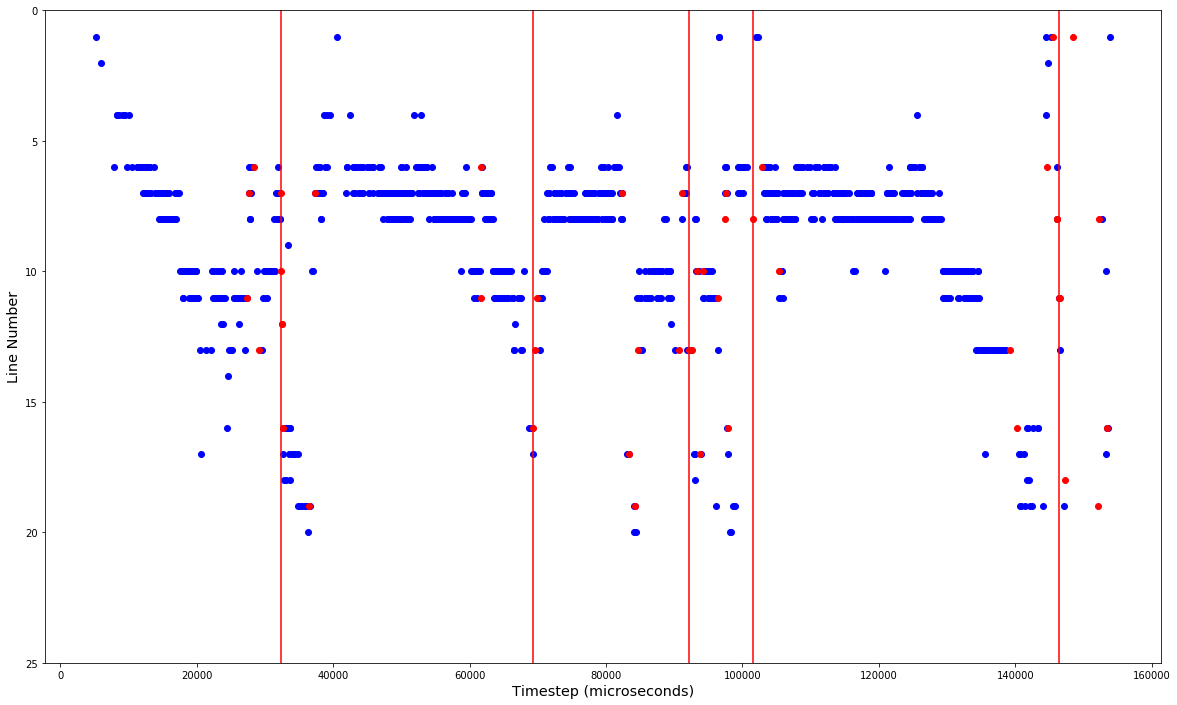

In [42]:
plot_colored_data_with_segments(data_blue_med,data_red_med,segments,saveplace=None)